In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from common import make_data_dict, make_sur_map, make_bin_map, make_sur, myscore, cut_range, clean_parameters
from collections import OrderedDict
from pathlib import Path as _p

sensor_data = make_data_dict()

In [20]:
pre_map =  make_sur_map(sensor_data['S8'][0])
post_map =  make_sur_map(sensor_data['S8'][1])
BINNING_TYPE = '8'
df2 = pd.read_csv("data/bin_map/EllipticIRRAD{}.csv".format(BINNING_TYPE), skiprows=1, names=['col','row','bin'], sep=" ")
bin_map = make_bin_map(df2)
binsize = len(df2['bin'].unique())
pre = pd.merge(sensor_data['S8'][0], df2, on=['col','row'])
post = pd.merge(sensor_data['S8'][1], df2, on=['col','row'])

In [5]:
path1 = _p("data/charge_fitted_12042021/").glob("S8_Elliptic_8Bins_IRRAD_clS1_*_rndCalib8Bins.csv")
voltage_to_mpv8 = {}
for i in path1:
    d = i.stem.split('_')[-2]
    voltage_to_mpv8[d] = pd.read_csv(i, sep=';')
    
path1 = _p("data/charge_fitted_12042021/").glob("S8_Elliptic_8Bins_IRRAD_clS1_*_labCalib.csv")
lab_voltage_to_mpv8 = {}
for i in path1:
    d = i.stem.split('_')[-2]
    lab_voltage_to_mpv8[d] = pd.read_csv(i, sep=';')

In [6]:
bin_8_fluences = [
7.504e+15 ,
7.187e+15,
6.595e+15,
5.76e+15,
4.766e+15,
3.655e+15,
2.681e+15,
1.779e+15 ,
]

df_8_fl= pd.read_csv('data/charge_fitted_12042021/S8_Elliptic_8Bins_IRRAD_CustomFlnAlignment_Evaluated.csv', skiprows=3, sep=';', names=['bin','area','fluence'])
df_14_fl= pd.read_csv('data/charge_fitted_12042021/S8_Elliptic_14Bins_IRRAD_CustomFlnAlignment_Evaluated.csv', skiprows=3, sep=';', names=['bin','area','fluence'])

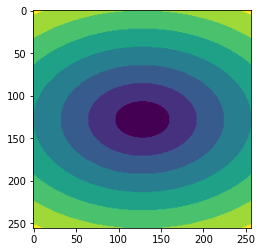

In [21]:
plt.imshow(bin_map)

In [17]:
df_14_fl

bin      area       fluence
0     1  0.021840  7.665130e+15
1     2  0.066278  7.415340e+15
2     3  0.110140  7.258730e+15
3     4  0.154003  6.958710e+15
4     5  0.198077  6.557350e+15
5     6  0.221611  6.104290e+15
6     7  0.229083  5.554680e+15
7     8  0.247082  4.995200e+15
8     9  0.260967  4.372370e+15
9    10  0.229658  3.732120e+15
10   11  0.150010  3.061270e+15
11   12  0.064856  2.556930e+15
12   13  0.025924  2.052600e+15
13   14  0.002934  9.923780e+14

In [7]:
bin_14_fluences = df_14_fl['fluence']

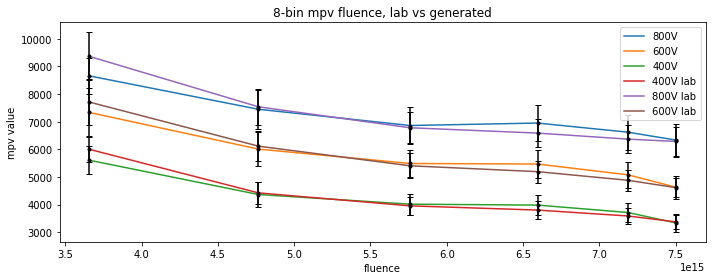

In [26]:
fig, axes = plt.subplots(1,1, figsize=(10,4))
k = 2
for v in voltage_to_mpv8:
    df1 = voltage_to_mpv8[v]
    mpvs = df1.MPV_BinnedDUT.values[:-k]
    width = df1.Sigma_BinnedDUT.values[:-k]
    axes.plot(bin_8_fluences[:-k], mpvs, label=v)
    (_, caps, _) = axes.errorbar(bin_8_fluences[:-k], mpvs, yerr=width,  fmt='.k', capsize=3 )
for v in lab_voltage_to_mpv8:
    df2 = lab_voltage_to_mpv8[v]
    mpvs = df2.MPV_BinnedDUT.values[:-k]
    width = df2.Sigma_BinnedDUT.values[:-k]
    axes.plot(bin_8_fluences[:-k], mpvs, label=v+" lab")
    (_, caps, _) = axes.errorbar(bin_8_fluences[:-k], mpvs, yerr=width,  fmt='.k', capsize=3 )
axes.set_ylabel("mpv value")
axes.set_xlabel("fluence")
axes.set_title("8-bin mpv fluence, lab vs generated")
axes.legend()
fig.tight_layout()

TypeError: 'AxesSubplot' object is not subscriptable

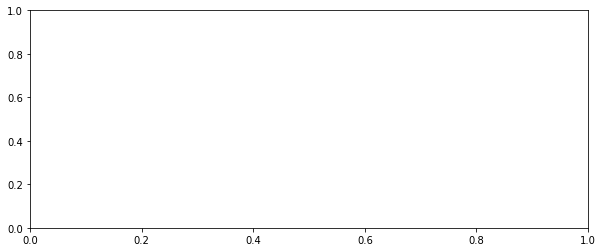

In [23]:
mpvs = df1.MPV_BinnedDUT.values
width = df1.Sigma_BinnedDUT.values
def doit(x):
    return mpvs[x]
dv = np.vectorize(doit)
fig, axes = plt.subplots(1,1, figsize=(10,4))
heatmap = axes[0].imshow(dv(bin_map),cmap=plt.get_cmap('inferno') )

cbar = plt.colorbar(heatmap, ax=axes[0])
cbar.set_label('MPV',size=18)
axes[1].plot(bin_8_fluences, mpvs)
(_, caps, _) = axes[1].errorbar(bin_8_fluences, mpvs, yerr=width,  fmt='.k', capsize=3 )
fig.tight_layout()

In [10]:
pre_map =  make_sur_map(sensor_data['S8'][0])
post_map =  make_sur_map(sensor_data['S8'][1])
BINNING_TYPE = '14'
df2 = pd.read_csv("data/bin_map/EllipticIRRAD{}.csv".format(BINNING_TYPE), skiprows=1, names=['col','row','bin'], sep=" ")
bin_map = make_bin_map(df2)
binsize = len(df2['bin'].unique())
pre = pd.merge(sensor_data['S8'][0], df2, on=['col','row'])
post = pd.merge(sensor_data['S8'][1], df2, on=['col','row'])

In [11]:
path1 = _p("data/charge_fitted_12042021/").glob("S8_Elliptic_14Bins_IRRAD_clS1_*_rndCalib8Bins.csv")
voltage_to_mpv14 = {}
for i in path1:
    d = i.stem.split('_')[-2]
    voltage_to_mpv14[d] = pd.read_csv(i, sep=';')
    
path1 = _p("data/charge_fitted_12042021/").glob("S8_Elliptic_14Bins_IRRAD_clS1_*_labCalib.csv")
lab_voltage_to_mpv14 = {}
for i in path1:
    d = i.stem.split('_')[-2]
    lab_voltage_to_mpv14[d] = pd.read_csv(i, sep=';')

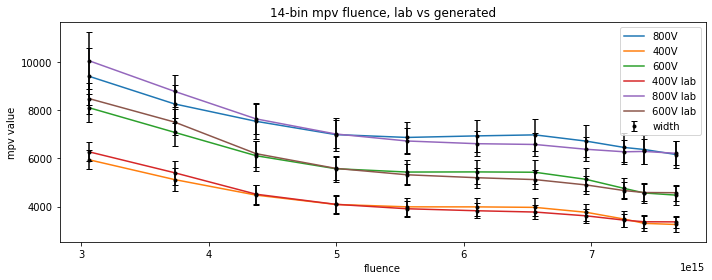

In [12]:
fig, axes = plt.subplots(1,1, figsize=(10,4))
k = 3
unlabeled = True
for v in voltage_to_mpv14:
    df1 = voltage_to_mpv14[v]
    mpvs = df1.MPV_BinnedDUT.values[:-k]
    width = df1.Sigma_BinnedDUT.values[:-k]
    axes.plot(bin_14_fluences[:-k], mpvs, label=v)
    (_, caps, _) = axes.errorbar(bin_14_fluences[:-k], mpvs, yerr=width,  fmt='.k', capsize=3 )
for v in lab_voltage_to_mpv14:
    df2 = lab_voltage_to_mpv14[v]
    mpvs = df2.MPV_BinnedDUT.values[:-k]
    width = df2.Sigma_BinnedDUT.values[:-k]
    axes.plot(bin_14_fluences[:-k], mpvs, label=v+" lab")
    label = 'width' if unlabeled else None
    (_, caps, _) = axes.errorbar(bin_14_fluences[:-k], mpvs, yerr=width,  fmt='.k', capsize=3, label=label)
    unlabeled = False
axes.set_ylabel("mpv value")
axes.set_xlabel("fluence")
axes.legend()
axes.set_title("14-bin mpv fluence, lab vs generated")
fig.tight_layout()

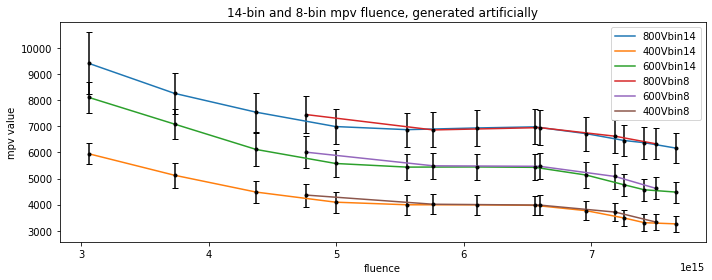

In [15]:
fig, axes = plt.subplots(1,1, figsize=(10,4))
k = 3
unlabeled = True
for v in voltage_to_mpv14:
    df1 = voltage_to_mpv14[v]
    mpvs = df1.MPV_BinnedDUT.values[:-k]
    width = df1.Sigma_BinnedDUT.values[:-k]
    axes.plot(bin_14_fluences[:-k], mpvs, label=v+'bin14')
    (_, caps, _) = axes.errorbar(bin_14_fluences[:-k], mpvs, yerr=width,  fmt='.k', capsize=3 )
for v in voltage_to_mpv8:
    df1 = voltage_to_mpv8[v]
    mpvs = df1.MPV_BinnedDUT.values[:-k]
    width = df1.Sigma_BinnedDUT.values[:-k]
    axes.plot(bin_8_fluences[:-k], mpvs, label=v+'bin8')
    (_, caps, _) = axes.errorbar(bin_8_fluences[:-k], mpvs, yerr=width,  fmt='.k', capsize=3 )
axes.set_ylabel("mpv value")
axes.set_xlabel("fluence")
axes.legend()
axes.set_title("14-bin and 8-bin mpv fluence, generated artificially")
fig.tight_layout()